## Collect Model Output Data and Generate Features

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
# NN Feature Representations
prefix = 'rnn_product'
h_df = pd.DataFrame(np.load('../rnn_product/predictions_bmm/final_states.npy')).add_prefix('{}_h'.format(prefix))
h_df['user_id'] = np.load('../rnn_product/predictions_bmm/user_ids.npy')
h_df['product_id'] = np.load('../rnn_product/predictions_bmm/product_ids.npy')
h_df['label'] = np.load('../rnn_product/data/label.npy')
h_df['rnn_pred_prob'] = np.load('../rnn_product/predictions_bmm/predictions.npy')

# Matrix Factorization Representations
nnmf_p_matrix = np.load('../nnmf/predictions/product_embeddings.npy')
product_emb_df = pd.DataFrame(nnmf_p_matrix, columns=['nnmf_product_{}'.format(i) for i in range(nnmf_p_matrix.shape[1])])
product_emb_df['product_id'] = np.arange(nnmf_p_matrix.shape[0])
h_df = h_df.merge(product_emb_df, how='left', on='product_id')

nnmf_u_matrix = np.load('../nnmf/predictions/user_embeddings.npy')
user_emb_df = pd.DataFrame(nnmf_u_matrix, columns=['nnmf_user_{}'.format(i) for i in range(nnmf_u_matrix.shape[1])])
user_emb_df['user_id'] = np.arange(nnmf_u_matrix.shape[0])
h_df = h_df.merge(user_emb_df, how='left', on='user_id')

In [4]:
print(h_df.columns[50:90])

Index(['user_id', 'product_id', 'label', 'rnn_pred_prob', 'nnmf_product_0',
       'nnmf_product_1', 'nnmf_product_2', 'nnmf_product_3', 'nnmf_product_4',
       'nnmf_product_5', 'nnmf_product_6', 'nnmf_product_7', 'nnmf_product_8',
       'nnmf_product_9', 'nnmf_product_10', 'nnmf_product_11',
       'nnmf_product_12', 'nnmf_product_13', 'nnmf_product_14',
       'nnmf_product_15', 'nnmf_product_16', 'nnmf_product_17',
       'nnmf_product_18', 'nnmf_product_19', 'nnmf_product_20',
       'nnmf_product_21', 'nnmf_product_22', 'nnmf_product_23',
       'nnmf_product_24', 'nnmf_user_0', 'nnmf_user_1', 'nnmf_user_2',
       'nnmf_user_3', 'nnmf_user_4', 'nnmf_user_5', 'nnmf_user_6',
       'nnmf_user_7', 'nnmf_user_8', 'nnmf_user_9', 'nnmf_user_10'],
      dtype='object')


In [5]:
# Check Data Shape
h_df.shape
# Check Label type
label_col = h_df['label']
label_set = set(label_col)
label_count = {i: sum(label_col == i) for i in label_set}
print(label_count)

{0: 144013, 1: 13055, -1: 247650}


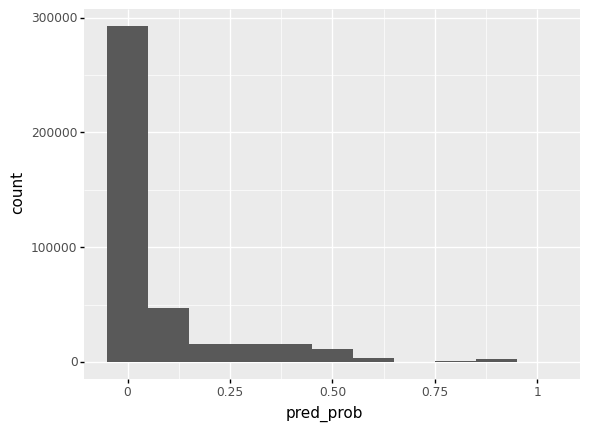

<ggplot: (-9223369038738926364)>

In [6]:
# print(product_df[product_df["label"].isna()].head(12)) # DataFrame Check
# product_df = product_df[product_df["label"].notna()] # remove NA
# Information Check:
from plotnine import ggplot, aes, geom_histogram
predictions_stage_one = pd.DataFrame({'pred_prob': h_df['rnn_pred_prob']})

(ggplot(predictions_stage_one, aes(x='pred_prob')) +
    geom_histogram(binwidth=0.1))

In [7]:
h_df.head(12) # Check DataFrame``

,rnn_product_h0,rnn_product_h1,rnn_product_h2,rnn_product_h3,rnn_product_h4,rnn_product_h5,rnn_product_h6,rnn_product_h7,rnn_product_h8,rnn_product_h9,...,nnmf_user_15,nnmf_user_16,nnmf_user_17,nnmf_user_18,nnmf_user_19,nnmf_user_20,nnmf_user_21,nnmf_user_22,nnmf_user_23,nnmf_user_24
0,0.0,0.0,1.466097,0.0,1.377993,0.0,0.000000,0.0,0.0,0.0,...,-0.065636,-0.376153,-0.906165,-0.814684,-0.203783,0.338899,0.164586,0.447281,0.915117,-0.282522
1,0.0,0.0,1.937660,0.0,1.445951,0.0,0.176641,0.0,0.0,0.0,...,-0.065636,-0.376153,-0.906165,-0.814684,-0.203783,0.338899,0.164586,0.447281,0.915117,-0.282522
2,0.0,0.0,1.235097,0.0,2.199120,0.0,0.000000,0.0,0.0,0.0,...,-0.065636,-0.376153,-0.906165,-0.814684,-0.203783,0.338899,0.164586,0.447281,0.915117,-0.282522
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.712574,-0.116489,0.012049,0.393817,-0.831623,-1.027908,-0.424698,1.196777,-0.139766,0.048858
4,0.0,0.0,1.489005,0.0,2.184947,0.0,0.000000,0.0,0.0,0.0,...,-0.584479,0.119896,1.133792,0.761519,0.457416,0.314816,0.341308,0.256595,-0.225738,0.323255
5,0.0,0.0,1.055788,0.0,2.644036,0.0,0.000000,0.0,0.0,0.0,...,-0.584479,0.119896,1.133792,0.761519,0.457416,0.314816,0.341308,0.256595,-0.225738,0.323255
6,0.0,0.0,1.584882,0.0,2.420799,0.0,0.000000,0.0,0.0,0.0,...,-0.094615,0.127354,-0.928224,-0.448131,0.757196,-0.369281,0.049059,0.118783,0.213246,0.643987
7,0.0,0.0,1.162066,0.0,2.808203,0.0,0.000000,0.0,0.0,0.0,...,-0.094615,0.127354,-0.928224,-0.448131,0.757196,-0.369281,0.049059,0.118783,0.213246,0.643987
8,0.0,0.0,1.223328,0.0,0.528885,0.0,0.000000,0.0,0.0,0.0,...,-0.876804,-0.232124,0.258672,-0.356629,-0.430700,0.635753,-0.137124,0.443191,-0.500226,-0.255062
9,0.0,0.0,1.189265,0.0,0.311663,0.0,0.000000,0.0,0.0,0.0,...,-0.876804,-0.232124,0.258672,-0.356629,-0.430700,0.635753,-0.137124,0.443191,-0.500226,-0.255062


In [8]:
drop_cols = [
    'label',
    'user_id',
    'product_id',
    'rnn_pred_prob'
]
user_id = h_df['user_id']
product_id = h_df['product_id']
label = h_df['label']

h_df.drop(drop_cols, axis=1, inplace=True)
features = h_df.values
feature_names = h_df.columns.values
feature_maxs = features.max(axis=0)
feature_mins = features.min(axis=0)
feature_means = features.mean(axis=0)

In [9]:
# Save features
if not os.path.isdir('data'):
    os.makedirs('data')

np.save('data/user_id.npy', user_id)
np.save('data/product_id.npy', product_id)
np.save('data/features.npy', features)
np.save('data/feature_names.npy', h_df.columns)
np.save('data/feature_maxs.npy', feature_maxs)
np.save('data/feature_mins.npy', feature_mins)
np.save('data/feature_means.npy', feature_means)
np.save('data/label.npy', label)

## GBM Blend

In [1]:
import gc
import os
import pprint as pp
import random

import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
# Data Preprocessing
product_id = np.load('data/product_id.npy')
features = np.load('data/features.npy')
feature_names = np.load('data/feature_names.npy', allow_pickle=True)
label = np.load('data/label.npy')

product_df = pd.DataFrame(data=features, columns=feature_names)
product_df['label'] = label
product_df['product_id'] = product_id

# drop_cols = [i for i in product_df.columns if i.startswith('sgns') or i.startswith('nnmf')]
drop_cols = ['label', 'product_id']

In [3]:
# Shuffle Check: after shuffling, the precision keeps unchanged
# label = np.random.permutation(label)
# sum(pd.Series(label).isna())
# Imbalanced Sample Check:

In [4]:
# training
#self.train_val_df, self.test_df = df.train_test_split(train_size=0.8)
#self.train_df, self.val_df = self.train_val_df.train_test_split(train_size=0.9)
# df = product_df[product_df['label'] != -1]
# train_val_df, test_df = train_test_split(df, train_size=0.8)
# train_df, val_df = train_test_split(train_val_df, train_size=0.9)
# del product_df
# gc.collect()
# training
total_df = product_df[product_df['label'] != -1]
train_val_df, test_df = train_test_split(total_df, train_size=.80, random_state=42)
train_df, val_df = train_test_split(train_val_df, train_size=.80, random_state=43)
del product_df
gc.collect()

Y_train, Y_val = train_df['label'].astype(int).astype(float), val_df['label'].astype(int).astype(float)
X_train, X_val = train_df.drop(drop_cols, axis=1), val_df.drop(drop_cols, axis=1)
del train_df
gc.collect()

test_products = test_df['product_id']
X_test = test_df.drop(drop_cols, axis=1)
test_labels = test_df['label'].astype(int).astype(float)

In [5]:
# Training
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'learning_rate': .01,
    'num_leaves': 32,
    'max_depth': 4,
    'feature_fraction': 0.35,
    'bagging_fraction': 0.5,
    'bagging_freq': 2,
    'early_stopping_round': 100,
    'scale_pos_weight': 1
}
rounds = 4000
d_train = lgb.Dataset(X_train, label=Y_train, silent=True)
d_valid = lgb.Dataset(X_val, label=Y_val, silent=True)
del X_train, X_val, Y_train, Y_val

valid_sets = [d_train, d_valid]
valid_names = ['train', 'valid']
gbdt = lgb.train(params, d_train, rounds, valid_sets=valid_sets, valid_names=valid_names, verbose_eval=20)

/storage/work/z/zbh5185/myenv/lib64/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/storage/work/z/zbh5185/myenv/lib64/python3.6/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 8418, number of negative: 92105
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068827 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20553
[LightGBM] [Info] Number of data points in the train set: 100523, number of used features: 81
Training until validation scores don't improve for 100 rounds
[20]	train's binary_logloss: 0.279878	valid's binary_logloss: 0.278761
[40]	train's binary_logloss: 0.274489	valid's binary_logloss: 0.273852
[60]	train's binary_logloss: 0.270507	valid's binary_logloss: 0.270231
[80]	train's binary_logloss: 0.267393	valid's binary_logloss: 0.267376
[100]	train's binary_logloss: 0.264938	valid's binary_logloss: 0.265158
[120]	train's binary_logloss: 0.262989	valid's binary_logloss: 0.263423
[140]	train's binary_logloss: 0.261413	valid's binary_logloss: 0.262058
[160]	train's binary_logloss: 0.260078	valid's binary_logloss: 0.260877
[1

[2180]	train's binary_logloss: 0.22802	valid's binary_logloss: 0.247939
[2200]	train's binary_logloss: 0.227814	valid's binary_logloss: 0.247927
[2220]	train's binary_logloss: 0.227617	valid's binary_logloss: 0.247916
[2240]	train's binary_logloss: 0.227446	valid's binary_logloss: 0.247894
[2260]	train's binary_logloss: 0.227267	valid's binary_logloss: 0.247886
[2280]	train's binary_logloss: 0.227063	valid's binary_logloss: 0.247852
[2300]	train's binary_logloss: 0.22686	valid's binary_logloss: 0.247797
[2320]	train's binary_logloss: 0.226688	valid's binary_logloss: 0.247755
[2340]	train's binary_logloss: 0.226503	valid's binary_logloss: 0.247739
[2360]	train's binary_logloss: 0.22631	valid's binary_logloss: 0.247713
[2380]	train's binary_logloss: 0.22611	valid's binary_logloss: 0.247672
[2400]	train's binary_logloss: 0.225926	valid's binary_logloss: 0.247649
[2420]	train's binary_logloss: 0.225732	valid's binary_logloss: 0.247611
[2440]	train's binary_logloss: 0.225534	valid's binary_

In [6]:
# Evaluate and Predict
features = gbdt.feature_name()
importance = list(gbdt.feature_importance())
importance = zip(features, importance)
importance = sorted(importance, key=lambda x: x[1])
total = sum(j for i, j in importance)
importance = [(i, float(j)/total) for i, j in importance]
pp.pprint(importance)

[('rnn_product_h0', 0.0),
 ('rnn_product_h1', 0.0),
 ('rnn_product_h5', 0.0),
 ('rnn_product_h7', 0.0),
 ('rnn_product_h8', 0.0),
 ('rnn_product_h11', 0.0),
 ('rnn_product_h12', 0.0),
 ('rnn_product_h14', 0.0),
 ('rnn_product_h18', 0.0),
 ('rnn_product_h21', 0.0),
 ('rnn_product_h26', 0.0),
 ('rnn_product_h32', 0.0),
 ('rnn_product_h34', 0.0),
 ('rnn_product_h38', 0.0),
 ('rnn_product_h39', 0.0),
 ('rnn_product_h40', 0.0),
 ('rnn_product_h44', 0.0),
 ('rnn_product_h46', 0.0),
 ('rnn_product_h47', 0.0),
 ('rnn_product_h22', 0.0012334992425881844),
 ('rnn_product_h29', 0.0021207530837481065),
 ('rnn_product_h42', 0.0022722354468729714),
 ('rnn_product_h20', 0.003094568275265094),
 ('rnn_product_h24', 0.0035490153646396882),
 ('rnn_product_h45', 0.003851980090889418),
 ('rnn_product_h9', 0.005042198658299069),
 ('rnn_product_h3', 0.006816706340618914),
 ('rnn_product_h6', 0.007790521532135901),
 ('rnn_product_h41', 0.008331529971867561),
 ('rnn_product_h49', 0.009002380437134819),
 ('rnn_

In [7]:
test_preds = gbdt.predict(X_test, num_iteration=gbdt.best_iteration)

dirname = 'predictions_gbm'
if not os.path.isdir(dirname):
    os.makedirs(dirname)

np.save(os.path.join(dirname, 'product_ids.npy'), test_products)
np.save(os.path.join(dirname, 'predictions.npy'), test_preds)
np.save(os.path.join(dirname, 'labels.npy'), test_labels)

## Logistic Blend

In [23]:
import gc
import os
import pprint as pp

import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

from HTL_utils import tune_regularization


In [24]:
# Data Preprocessing
product_id = np.load('data/product_id.npy')
features = np.load('data/features.npy')
feature_names = np.load('data/feature_names.npy', allow_pickle=True)
label = np.load('data/label.npy')

product_df = pd.DataFrame(data=features, columns=feature_names)
product_df['product_id'] = product_id
product_df['label'] = label

# Dictionary to obtain aisle and department information
products = pd.read_csv('../../data/raw/products.csv')
product_to_aisle = dict(zip(products['product_id'], products['aisle_id']))
product_to_department = dict(zip(products['product_id'], products['department_id']))
product_to_name = dict(zip(products['product_id'], products['product_name']))
del products

In [25]:
product_df[product_df["label"]!=-1].head(6) # Check the dataframe

,rnn_product_h0,rnn_product_h1,rnn_product_h2,rnn_product_h3,rnn_product_h4,rnn_product_h5,rnn_product_h6,rnn_product_h7,rnn_product_h8,rnn_product_h9,...,nnmf_user_17,nnmf_user_18,nnmf_user_19,nnmf_user_20,nnmf_user_21,nnmf_user_22,nnmf_user_23,nnmf_user_24,product_id,label
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.012049,0.393817,-0.831623,-1.027908,-0.424698,1.196777,-0.139766,0.048858,0,0
6,0.0,0.0,1.584882,0.0,2.420799,0.0,0.0,0.0,0.0,0.0,...,-0.928224,-0.448131,0.757196,-0.369281,0.049059,0.118783,0.213246,0.643987,23457,1
7,0.0,0.0,1.162066,0.0,2.808203,0.0,0.0,0.0,0.0,0.0,...,-0.928224,-0.448131,0.757196,-0.369281,0.049059,0.118783,0.213246,0.643987,0,0
15,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.012049,0.393817,-0.831623,-1.027908,-0.424698,1.196777,-0.139766,0.048858,0,0
20,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.012049,0.393817,-0.831623,-1.027908,-0.424698,1.196777,-0.139766,0.048858,0,0
23,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.012049,0.393817,-0.831623,-1.027908,-0.424698,1.196777,-0.139766,0.048858,0,0


In [26]:
### EDA: heterogeneity across aisles and departments
import seaborn as sns
import matplotlib.pyplot as plt

# Map aisle and department information to the product_df
product_df['aisle_id'] = product_df['product_id'].map(product_to_aisle)
product_df['department_id'] = product_df['product_id'].map(product_to_department)

# Count the number of samples in each aisle and department
aisle_counts = product_df['aisle_id'].value_counts().tolist()
department_counts = product_df['department_id'].value_counts().tolist()

print("aisle_counts:", aisle_counts)
print("department_counts:", department_counts)

# # Assign department_id to each product in the dataframe
# product_df = product_df.assign(department_id=product_df['product_id'].map(product_to_department))

# # Identify the top 2 departments
# most_common_departments = product_df['department_id'].value_counts().nlargest(2).index.tolist()

# # Initialize a dictionary to store the correlation matrices
# corr_matrices = {}

# # Calculate the correlation matrix for each of the top 2 departments
# for department in most_common_departments:
#     department_df = product_df[product_df['department_id'] == department]
#     department_df = department_df.drop(columns=['product_id', 'label', 'aisle_id', 'department_id'])
#     corr_matrix = department_df.corr()
#     corr_matrices[department] = corr_matrix

#     # Plot the heatmap
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(corr_matrix, cmap='coolwarm', cbar=False)
#     plt.title(f'Correlation Heatmap for Department {department}')
#     plt.show()

# Print the correlation matrices
# for department, corr_matrix in corr_matrices.items():
#    print(f'Correlation Matrix for Department {department}:\n{corr_matrix}\n')


aisle_counts: [34012, 31454, 16618, 13136, 9646, 7112, 6941, 6837, 5608, 5310, 5259, 5232, 5154, 4666, 4413, 4247, 4155, 4111, 3862, 3857, 3821, 3806, 3739, 3443, 3384, 3321, 3258, 3120, 3117, 3094, 3090, 3088, 3081, 3079, 3003, 2982, 2765, 2715, 2566, 2515, 2440, 2396, 2365, 2304, 2218, 2146, 2072, 2018, 2003, 1943, 1910, 1727, 1712, 1701, 1595, 1520, 1437, 1300, 1260, 1256, 1229, 1203, 1156, 1148, 1141, 1136, 1089, 1067, 1029, 932, 908, 906, 905, 898, 897, 875, 817, 801, 779, 762, 762, 756, 709, 671, 660, 598, 556, 495, 484, 454, 443, 418, 415, 389, 378, 378, 377, 375, 358, 333, 326, 325, 325, 320, 320, 301, 279, 271, 255, 245, 238, 234, 233, 227, 214, 213, 210, 198, 194, 174, 168, 156, 149, 132, 129, 128, 126, 120, 113, 112, 112, 102, 95, 57]
department_counts: [88477, 48770, 28963, 24046, 22975, 22604, 11892, 10912, 9945, 9679, 8407, 7327, 7104, 5485, 4615, 3312, 1417, 876, 801, 443, 378]


In [27]:
drop_cols = ['label','product_id', 'label', 'aisle_id','department_id']

# Generate Interaction terms
for i in range(25):
    product_df[f'interaction_{i}'] = product_df[f'nnmf_user_{i}'] * product_df[f'nnmf_product_{i}']

# training
#self.train_val_df, self.test_df = df.train_test_split(train_size=0.8)
#self.train_df, self.val_df = self.train_val_df.train_test_split(train_size=0.9)
df = product_df[product_df['label'] != -1]
train_val_df, test_df = train_test_split(df, train_size=0.8, random_state=42)
train_df, val_df = train_test_split(train_val_df, train_size=0.8, random_state=43)
train_df, val_df, test_df = train_df.dropna(), val_df.dropna(), test_df.dropna()

Y_train, Y_val = train_df['label'].astype(int).astype(float), val_df['label'].astype(int).astype(float)
X_train, X_val = train_df.drop(drop_cols, axis=1), val_df.drop(drop_cols, axis=1)
X_test, Y_test = test_df.drop(drop_cols, axis=1), test_df['label'].astype(int).astype(float)

# Initialize a scaler on the training data, then apply it to the features
scaler = StandardScaler() 
X_train_s = scaler.fit_transform(X_train)
X_train, X_val = pd.DataFrame(X_train_s, columns=X_train.columns), pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
test_products = test_df['product_id']
test_labels = test_df['label'].astype(int).astype(float)

In [28]:
# df.columns
print(X_val.shape, Y_val.shape)

(20366, 125) (20366,)


In [29]:
# Define a list of regularization parameters to try
C_values = [0.01, 0.1, 1]

# Call the function
best_C, best_log_loss, best_model = tune_regularization(X_train, Y_train, X_val, Y_val, C_values)
print(f'Best Regularization Parameter: {best_C}, Best Validation Log Loss: {best_log_loss}')

Regularization Parameter: 0.01, Validation Log Loss: 0.46249827323091347
Regularization Parameter: 0.1, Validation Log Loss: 0.461530490449015
Regularization Parameter: 1, Validation Log Loss: 0.46148739789804777
Best Regularization Parameter: 1, Best Validation Log Loss: 0.46148739789804777


In [16]:
# best_model.coef_

In [30]:
test_preds = best_model.predict_proba(X_test)[:,1]
test_preds_label = best_model.predict(X_test)
# Check the prediction result
print(pd.DataFrame({"naive_logistic":test_preds_label}).value_counts())

naive_logistic
0.0               23106
1.0                2257
dtype: int64


In [37]:
best_model_coeff = best_model.coef_
best_model_inter = best_model.intercept_

In [38]:
dirname = 'predictions_logistic'
if not os.path.isdir(dirname):
    os.makedirs(dirname)

np.save(os.path.join(dirname, 'product_ids.npy'), test_products)
np.save(os.path.join(dirname, 'predictions.npy'), test_preds)
np.save(os.path.join(dirname, 'labels.npy'), test_labels)
np.save(os.path.join(dirname, 'coefficients.npy'), best_model_coeff)
np.save(os.path.join(dirname, 'intercepts.npy'), best_model_inter)

In [27]:
# ### Department-specific Models
# # Get the top 2 departments
# top_departments = df['department_id'].value_counts().index[:2]

department_models = {}
C_values = [0.01, 0.1, 1]

# Assign department_id to each product in the dataframe
product_df = product_df.assign(department_id=product_df['product_id'].map(product_to_department))

# Identify the top 2 departments
most_common_departments = product_df['department_id'].value_counts().nlargest(2).index.tolist()

for department in most_common_departments:
     # Filter the dataframe to only include rows from the current department
    print(f"Results for {department}:")
    depart_train_df = train_df[train_df['department_id'] == department]
    depart_val_df = val_df[val_df['department_id'] == department]
    
    Y_train, Y_val = depart_train_df['label'].astype(int).astype(float), depart_val_df['label'].astype(int).astype(float)
    X_train, X_val = depart_train_df.drop(drop_cols, axis=1), depart_val_df.drop(drop_cols, axis=1)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)

    
    # Call the function
    # Tune the regularization parameter and fit the logistic regression model
    best_C, best_log_loss, best_model = tune_regularization(X_train, Y_train, X_val, Y_val, C_values)
    print(f"Best_log_loss: {best_log_loss}")

    # Store the best model and its details in the dictionary
    department_models[department] = {'best_C': best_C, 'best_log_loss': best_log_loss, 'best_model': best_model}

Results for 4.0:
Regularization Parameter: 0.01, Validation Log Loss: 0.555277957154111
Regularization Parameter: 0.1, Validation Log Loss: 0.5498850676516944
Regularization Parameter: 1, Validation Log Loss: 0.5500587038550765
Best_log_loss: 0.5498850676516944
Results for 16.0:
Regularization Parameter: 0.01, Validation Log Loss: 0.5750287530664472
Regularization Parameter: 0.1, Validation Log Loss: 0.56649345743486
Regularization Parameter: 1, Validation Log Loss: 0.5657397371071023
Best_log_loss: 0.5657397371071023


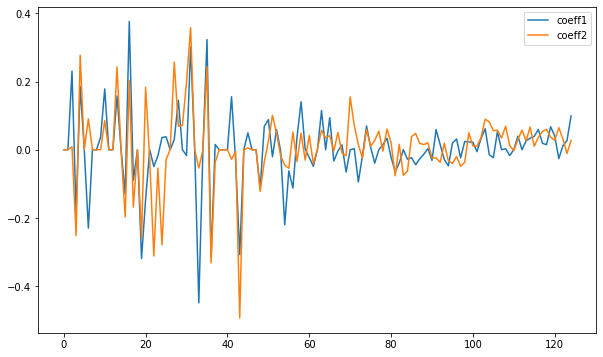

In [28]:
# Compare the (relative) coefficient difference between the two departments
coeff1 = department_models[most_common_departments[0]]['best_model'].coef_.flatten()
coeff2 = department_models[most_common_departments[1]]['best_model'].coef_.flatten()

pd.set_option('display.max_rows', 125)
dfplot = pd.DataFrame({'coeff1':coeff1, 'coeff2':coeff2})
# print(f'Coefficient difference between the two departments: {coeff_diff}')# 
# plt.hist(coeff_diff, bins=3)
# plt.show()

plt.figure(figsize=(10,6))

# Plot each column
for column in dfplot.columns:
    plt.plot(dfplot[column], label=column)
    
plt.legend()
plt.show()

In [21]:
pd.reset_option('display.max_rows')

## HTL-Logistic Blend

In [160]:
import os
import sys
import gc
import pprint as pp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

sys.path.append(os.getcwd())
from HTL_utils import create_ULM_data, create_vlambda, tune_regularization, cal_f_value

ImportError: cannot import name 'cal_f_value'

In [161]:
# Data Preprocessing
product_id = np.load('data/product_id.npy')
features = np.load('data/features.npy')
feature_names = np.load('data/feature_names.npy', allow_pickle=True)
label = np.load('data/label.npy')

product_df = pd.DataFrame(data=features, columns=feature_names)
product_df['product_id'] = product_id
product_df['label'] = label

# Dictionary to obtain aisle and department information
products = pd.read_csv('../../data/raw/products.csv')
product_to_aisle = dict(zip(products['product_id'], products['aisle_id']))
product_to_department = dict(zip(products['product_id'], products['department_id']))
product_to_name = dict(zip(products['product_id'], products['product_name']))
del products

# Map aisle and department information to the product_df
product_df['aisle_id'] = product_df['product_id'].map(product_to_aisle)
product_df['department_id'] = product_df['product_id'].map(product_to_department)

# Count the number of samples in each aisle and department
aisle_counts = product_df['aisle_id'].value_counts().tolist()
department_counts = product_df['department_id'].value_counts().tolist()

print("aisle_counts:", aisle_counts)
print("department_counts:", department_counts)

# Assign department_id to each product in the dataframe
product_df = product_df.assign(department_id=product_df['product_id'].map(product_to_department))

drop_cols = ['label','product_id', 'label', 'aisle_id','department_id']

# Generate Interaction terms
for i in range(25):
    product_df[f'interaction_{i}'] = product_df[f'nnmf_user_{i}'] * product_df[f'nnmf_product_{i}']

# training
#self.train_val_df, self.test_df = df.train_test_split(train_size=0.8)
#self.train_df, self.val_df = self.train_val_df.train_test_split(train_size=0.9)
df = product_df[product_df['label'] != -1]
train_val_df, test_df = train_test_split(df, train_size=0.8, random_state=42)
train_df, val_df = train_test_split(train_val_df, train_size=0.8, random_state=43)
train_df, val_df, test_df = train_df.dropna(), val_df.dropna(), test_df.dropna()

Y_train, Y_val = train_df['label'].astype(int).astype(float), val_df['label'].astype(int).astype(float)
X_train, X_val = train_df.drop(drop_cols, axis=1), val_df.drop(drop_cols, axis=1)
X_test, Y_test = test_df.drop(drop_cols, axis=1), test_df['label'].astype(int).astype(float)

# Initialize a scaler on the training data, then apply it to the features
scaler = StandardScaler() 
X_train_s = scaler.fit_transform(X_train)
X_train, X_val = pd.DataFrame(X_train_s, columns=X_train.columns), pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
test_products = test_df['product_id']
test_labels = test_df['label'].astype(int).astype(float)

aisle_counts: [34012, 31454, 16618, 13136, 9646, 7112, 6941, 6837, 5608, 5310, 5259, 5232, 5154, 4666, 4413, 4247, 4155, 4111, 3862, 3857, 3821, 3806, 3739, 3443, 3384, 3321, 3258, 3120, 3117, 3094, 3090, 3088, 3081, 3079, 3003, 2982, 2765, 2715, 2566, 2515, 2440, 2396, 2365, 2304, 2218, 2146, 2072, 2018, 2003, 1943, 1910, 1727, 1712, 1701, 1595, 1520, 1437, 1300, 1260, 1256, 1229, 1203, 1156, 1148, 1141, 1136, 1089, 1067, 1029, 932, 908, 906, 905, 898, 897, 875, 817, 801, 779, 762, 762, 756, 709, 671, 660, 598, 556, 495, 484, 454, 443, 418, 415, 389, 378, 378, 377, 375, 358, 333, 326, 325, 325, 320, 320, 301, 279, 271, 255, 245, 238, 234, 233, 227, 214, 213, 210, 198, 194, 174, 168, 156, 149, 132, 129, 128, 126, 120, 113, 112, 112, 102, 95, 57]
department_counts: [88477, 48770, 28963, 24046, 22975, 22604, 11892, 10912, 9945, 9679, 8407, 7327, 7104, 5485, 4615, 3312, 1417, 876, 801, 443, 378]


In [162]:
department_models = {}
C_values = [0.1]

rank_dep_of_interest = 9
# Identify first 6th departments (bad)
# Identify first 8th departments (bit worse)
# Identify first 9th departments (good)
# With the 18th as the pet department
common_departments = product_df['department_id'].value_counts().nlargest(rank_dep_of_interest).index.tolist()

# Initialize lists to hold source and target data
X, y = [], []
X0, y0 = None, None

for i, department in enumerate(common_departments):
     # Filter the dataframe to only include rows from the current department
    print(f"Results for ({i+1}th largest) {department}:")
    depart_train_df = train_df[train_df['department_id'] == department]
    depart_val_df = val_df[val_df['department_id'] == department]
    
    Y_train, Y_val = depart_train_df['label'].astype(int).astype(float), depart_val_df['label'].astype(int).astype(float)
    X_train, X_val = depart_train_df.drop(drop_cols, axis=1), depart_val_df.drop(drop_cols, axis=1)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)

    print(f"Input Data size:{X_train.shape}")
    
    if i == (rank_dep_of_interest - 1):
        # Save the first department's data as the target data
        X0, y0 = X_train, Y_train
    else:
        # Save the other departments' data as the source data
        X.append(X_train)
        y.append(Y_train)
    
    # Tune the regularization parameter and fit the logistic regression model
    best_C, best_log_loss, best_model = tune_regularization(X_train, Y_train, X_val, Y_val, C_values)
    print(f"Best_log_loss: {best_log_loss}")

    # Store the best model and its details in the dictionary
    department_models[department] = {'best_C': best_C, 'best_log_loss': best_log_loss, 'best_model': best_model}

Results for (1th largest) 4.0:
Input Data size:(20805, 125)
Regularization Parameter: 0.1, Validation Log Loss: 0.5498851008494482
Best_log_loss: 0.5498851008494482
Results for (2th largest) 16.0:
Input Data size:(10928, 125)
Regularization Parameter: 0.1, Validation Log Loss: 0.5664935506285842
Best_log_loss: 0.5664935506285842
Results for (3th largest) 19.0:
Input Data size:(7525, 125)
Regularization Parameter: 0.1, Validation Log Loss: 0.43980628860679466
Best_log_loss: 0.43980628860679466
Results for (4th largest) 7.0:
Input Data size:(5595, 125)
Regularization Parameter: 0.1, Validation Log Loss: 0.560455745776329
Best_log_loss: 0.560455745776329
Results for (5th largest) 13.0:
Input Data size:(7438, 125)
Regularization Parameter: 0.1, Validation Log Loss: 0.2379918609868116
Best_log_loss: 0.2379918609868116
Results for (6th largest) 1.0:
Input Data size:(6240, 125)
Regularization Parameter: 0.1, Validation Log Loss: 0.43271922202454743
Best_log_loss: 0.43271922202454743
Results f

In [163]:
# Apply transfer learning for these two departments
ULM_data = create_ULM_data(y, y0, X, X0)

# An additional scale step, may lead to scaling issues
# st_scaler = StandardScaler()
# X_ULM = st_scaler.fit_transform(ULM_data['X_ULM']) / vlambda
# y_ULM = ULM_data['y_ULM']

vlambda = create_vlambda(X, X0) # Penalty vector, 500 is for scaling
X_ULM, y_ULM = ULM_data['X_ULM'] / vlambda, ULM_data['y_ULM']

# X_ULM, y_ULM = ULM_data['X_ULM'], ULM_data['y_ULM']

In [164]:
print(np.mean(vlambda))
print(set(vlambda))

0.03435889071981061
{0.04720633285028296, 0.02448028387585459, 0.028225685047312085, 0.019439303146242787, 0.08480219091337864, 0.02839027872767189, 0.02585286623025972, 0.016620423099946536, 0.03421265258734633}


In [165]:
print(X_ULM.shape)
print(y_ULM.shape)
print(X0.shape)

(67140, 1125)
(67140,)
(2502, 125)


In [166]:
# Fit the Logistic Regression model using the ULM-transformed data
log_reg = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', class_weight={0:1, 1:5})
log_reg.fit(X_ULM, y_ULM)

# Extract the last X0.shape[1] coefficients as the output coefficients for the target task
HTL_coef = log_reg.coef_[:, -X0.shape[1]:]
HTL_intercept = log_reg.intercept_
# print("Coefficients for the target task:", HTL_coef)

In [167]:
# ### Compare the (relative) coefficient difference between the two departments and the HTL version
# coeff1 = department_models[common_departments[0]]['best_model'].coef_.flatten()
# coeff2 = department_models[common_departments[1]]['best_model'].coef_.flatten()
# coeffHTL = HTL_coef.flatten()

# dfplot = pd.DataFrame({'coeff1':coeff1, 'coeff2':coeff2, 'coeffHTL':coeffHTL})
# plt.figure(figsize=(10,6))

# # Plot each column
# for column in dfplot.columns:
#     plt.plot(dfplot[column], label=column)

# # Display the legend
# plt.legend()
# plt.show()

In [168]:
# ### Compare the (relative) coefficient difference between the two departments and the HTL version
# # Separate the first 50 features from the rest
# dfplot1 = dfplot.iloc[:50, :]
# dfplot2 = dfplot.iloc[50:, :]

# # Define the positions for the bars
# bar_width = 0.3
# positions1 = np.arange(len(dfplot1))
# positions2 = [pos + bar_width for pos in positions1]
# positions3 = [pos + bar_width for pos in positions2]

# # Plot for first 50 features
# plt.figure(figsize=(10,6))
# plt.bar(positions1, dfplot1['coeff1'], width=bar_width, label='coeff1')
# plt.bar(positions2, dfplot1['coeffHTL'], width=bar_width, label='coeffHTL')
# plt.bar(positions3, dfplot1['coeff2'], width=bar_width, label='coeff2')
# plt.legend()
# plt.title('Plot of Coefficients (product history features)')
# plt.xlabel('Index')
# plt.ylabel('Coefficient Value')
# plt.xticks([pos + bar_width for pos in positions1], dfplot1.index)
# plt.show()

# # Plot for the rest of features
# positions1 = np.arange(len(dfplot2))
# positions2 = [pos + bar_width for pos in positions1]
# positions3 = [pos + bar_width for pos in positions2]

# plt.figure(figsize=(10,6))
# plt.bar(positions1, dfplot2['coeff1'], width=bar_width, label='coeff1')
# plt.bar(positions2, dfplot2['coeffHTL'], width=bar_width, label='coeffHTL')
# plt.bar(positions3, dfplot2['coeff2'], width=bar_width, label='coeff2')
# plt.legend()
# plt.title('Plot of Coefficients (collaborative filtering features)')
# plt.xlabel('Index')
# plt.ylabel('Coefficient Value')
# plt.xticks([pos + bar_width for pos in positions1], dfplot2.index)
# plt.show()

In [169]:
# Compare the performance in the testing dataset
# Extract Coefficients
department = common_departments[rank_dep_of_interest-1]

# Calculate Predictions
depart_test_df = test_df[test_df['department_id'] == department]
depart_X_test = depart_test_df.drop(drop_cols, axis=1)
depart_X_test = pd.DataFrame(scaler.transform(depart_X_test), columns=depart_X_test.columns)
depart_Y_test = depart_test_df['label'].astype(int).astype(float)

In [170]:
print(depart_Y_test.shape)
print(department)

(774,)
20.0


In [171]:
### Performance using single-task algorithm
# Remember to add the intercept
coeff1 = department_models[department]['best_model'].coef_.flatten()
intercept1 = department_models[department]['best_model'].intercept_
depart_pred_prob = 1 / (1 + np.exp(-(np.dot(depart_X_test, coeff1) + intercept1)))
log_loss(depart_Y_test, depart_pred_prob)

0.5247573794533609

In [172]:
### Performance using pooling algorithm
coeff_pool = np.load("predictions_logistic/coefficients.npy").flatten()
intercept_pool = np.load("predictions_logistic/intercepts.npy")
pool_pred_prob = 1 / (1 + np.exp(-(np.dot(depart_X_test, coeff_pool) + intercept_pool)))
log_loss(depart_Y_test, pool_pred_prob)

0.49704547648992986

In [173]:
### Performance using HTL algorithm
coeffHTL = HTL_coef.flatten()
HTL_pred_prob = 1 / (1 + np.exp(-(np.dot(depart_X_test, coeffHTL) + HTL_intercept)))
log_loss(depart_Y_test, HTL_pred_prob)

0.45269395994449885

In [174]:
# # Check the prediction Probability (too large)
# plt.hist(depart_pred_prob)
# plt.title("Prediction Probability for the Test Set")
# plt.show()
# plt.hist(depart_Y_test)
# plt.title("Labels for the Test Set")
# plt.show()

In [175]:
### F1-value Evaluation and AUC evaluation
single_task_df = pd.DataFrame({'prediction': depart_pred_prob, 'label': depart_Y_test})
pooled_task_df = pd.DataFrame({'prediction': pool_pred_prob, 'label': depart_Y_test})
HTL_df = pd.DataFrame({'prediction': HTL_pred_prob, 'label': depart_Y_test})

In [151]:
true_label = single_task_df['label']
print("True Label Distribution:", true_label.value_counts())
# single-task LASSO
pred_single = (single_task_df['prediction'] > 0.5).astype(int)
print(cal_f_value(pred_single, true_label, "Single-Task"))
# pooled-task LASSO
pred_pooled = (pooled_task_df['prediction'] > 0.5).astype(int)
print(cal_f_value(pred_pooled, true_label, "Pooled-Task"))
# HTL LASSO
pred_HTL = (HTL_df['prediction'] > 0.5).astype(int)
print(cal_f_value(pred_HTL, true_label, "HTL"))

True Label Distribution: 0.0    686
1.0     88
Name: label, dtype: int64
         model    recall  precision   F_value
0  Single-Task  0.215909   0.139706  0.169643
         model    recall  precision   F_value
0  Pooled-Task  0.159091   0.191781  0.173913


ZeroDivisionError: division by zero

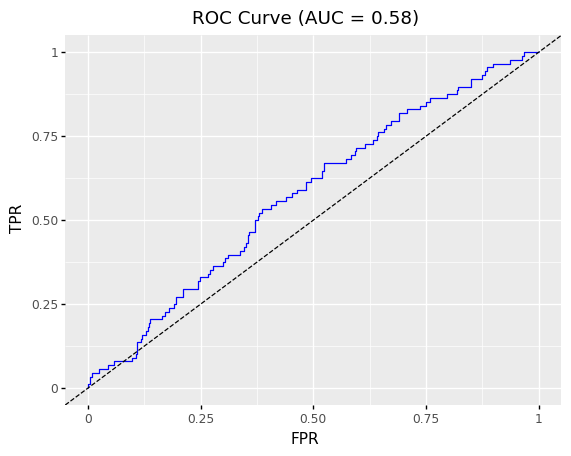


          FPR       TPR
0    0.000000  0.000000
1    0.001458  0.000000
2    0.001458  0.011364
3    0.004373  0.011364
4    0.004373  0.022727
..        ...       ...
147  0.963557  0.977273
148  0.963557  0.988636
149  0.966472  0.988636
150  0.966472  1.000000
151  1.000000  1.000000

[152 rows x 2 columns]


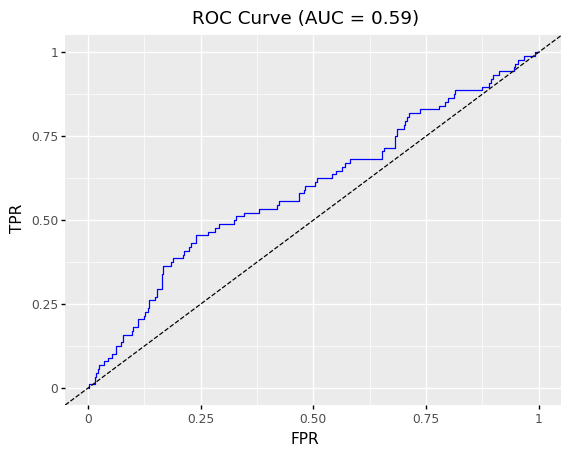


          FPR       TPR
0    0.000000  0.000000
1    0.001458  0.000000
2    0.002915  0.000000
3    0.002915  0.011364
4    0.016035  0.011364
..        ...       ...
150  0.966472  0.977273
151  0.966472  0.988636
152  0.991254  0.988636
153  0.991254  1.000000
154  1.000000  1.000000

[155 rows x 2 columns]


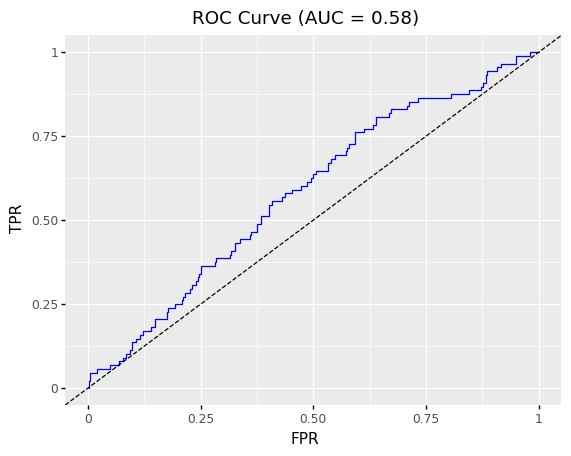


          FPR       TPR
0    0.000000  0.000000
1    0.001458  0.000000
2    0.002915  0.000000
3    0.002915  0.022727
4    0.005831  0.022727
..        ...       ...
152  0.950437  0.965909
153  0.950437  0.988636
154  0.981050  0.988636
155  0.981050  1.000000
156  1.000000  1.000000

[157 rows x 2 columns]


In [176]:
from sklearn.metrics import roc_curve, auc
from plotnine import ggplot, aes, geom_line, geom_abline, ggtitle
import pandas as pd

plot_roc(HTL_df['label'],single_task_df['prediction'])
plot_roc(HTL_df['label'],pooled_task_df['prediction'])
plot_roc(HTL_df['label'],HTL_df['prediction'])

## F-score Evaluation

In [48]:
from multiprocessing import Pool, cpu_count
import numpy as np
import pandas as pd

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support
from plotnine import ggplot, aes, geom_line, geom_abline, ggtitle
from plotnine.data import economics

In [49]:
# Load Data
gbm_df = pd.DataFrame({
    'product_id': np.load('predictions_gbm/product_ids.npy'),
    'prediction_gbm': np.load('predictions_gbm/predictions.npy'),
    'label': np.load('predictions_gbm/labels.npy')
})

# Load Data
logistic_df = pd.DataFrame({
    'product_id': np.load('predictions_logistic/product_ids.npy'),
    'prediction_gbm': np.load('predictions_logistic/predictions.npy'),
    'label': np.load('predictions_logistic/labels.npy')
})

In [50]:
# Combine the prediction
# pred_df = gbm_df.merge(nn_df, how='left', on=['order_id', 'product_id'])
# pred_df['prediction'] = .9*pred_df['prediction_gbm'] + .1*pred_df['prediction_nn']

In [47]:
# Calculate F-score
def cal_f_value(pred, label, model):
    TP = sum((label==1) & (pred==1))
    FP = sum((pred==1) & (label==0))
    FN = sum((pred==0) & (label==1))
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    F_value = 2 / (1/recall + 1/precision)
    summary = [model, recall, precision, F_value]
    summary_name = ["model", "recall", "precision", "F_value"]
    return(pd.DataFrame(dict(zip(summary_name, summary)), index=[0]))

In [52]:
true_label = gbm_df['label']
print("True Label Distribution:", true_label.value_counts())
# gbm
pred_gbm = (gbm_df['prediction_gbm'] > 0.5).astype(int)
print(cal_f_value(pred_gbm, true_label, "GBM"))

True Label Distribution: 0.0    28862
1.0     2552
Name: label, dtype: int64
  model   recall  precision  F_value
0   GBM  0.02116   0.556701  0.04077


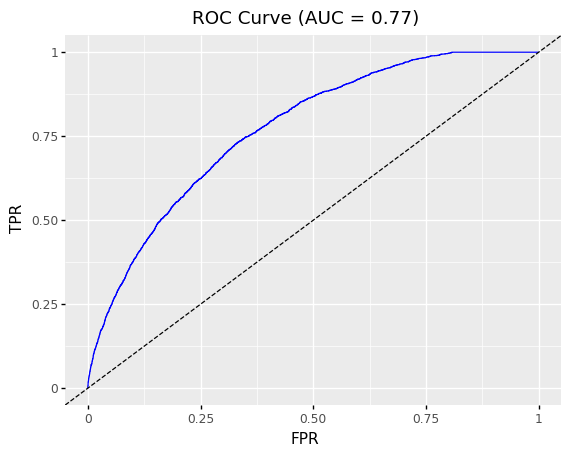


           FPR       TPR
0     0.000000  0.000000
1     0.000000  0.000392
2     0.000104  0.000392
3     0.000104  0.002743
4     0.000139  0.002743
...        ...       ...
4279  0.806978  0.999608
4280  0.807706  0.999608
4281  0.807706  1.000000
4282  0.818446  1.000000
4283  1.000000  1.000000

[4284 rows x 2 columns]


In [53]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(true_label, gbm_df['prediction_gbm'])
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Create the ROC plot
roc_plot = (ggplot(roc_df, aes(x='FPR', y='TPR')) +
            geom_line(color='blue') +
            geom_abline(intercept=0, slope=1, color='black', linetype='dashed') +
            ggtitle(f'ROC Curve (AUC = {roc_auc:.2f})'))

print(roc_plot)
print(roc_df)

In [54]:
true_label = logistic_df['label']
print("True Label Distribution:", true_label.value_counts())
# gbm
pred_logistic = (logistic_df['prediction_gbm'] > 0.5).astype(int)
print(cal_f_value(pred_logistic, true_label, "Logistic"))

True Label Distribution: 0.0    22998
1.0     2365
Name: label, dtype: int64
      model    recall  precision  F_value
0  Logistic  0.202537   0.212229  0.20727


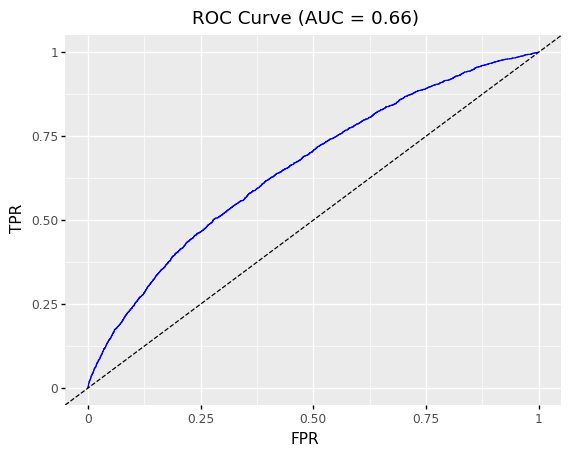


           FPR       TPR
0     0.000000  0.000000
1     0.000000  0.000423
2     0.000217  0.000423
3     0.000217  0.002114
4     0.000304  0.002114
...        ...       ...
4162  0.997522  0.999154
4163  0.997522  0.999577
4164  0.999609  0.999577
4165  0.999609  1.000000
4166  1.000000  1.000000

[4167 rows x 2 columns]


In [55]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(true_label, logistic_df['prediction_gbm'])
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Create the ROC plot
roc_plot = (ggplot(roc_df, aes(x='FPR', y='TPR')) +
            geom_line(color='blue') +
            geom_abline(intercept=0, slope=1, color='black', linetype='dashed') +
            ggtitle(f'ROC Curve (AUC = {roc_auc:.2f})'))

print(roc_plot)
print(roc_df)

In [41]:
# Predict results
predictions_stage_one = pd.DataFrame({'pred_prob': np.load('../rnn_product/predictions_bmm/predictions.npy').flatten()})
predictions_stage_one['pred_label'] = (predictions_stage_one['pred_prob'] > 0.5).astype(int)
# True Labels for first-stage modelling
stage_true_label = np.load('../rnn_product/data/label.npy')
# Append Label Column
predictions_stage_one['label'] = stage_true_label
# Dataset with labels
comparison_df = predictions_stage_one[predictions_stage_one['label']!=-1]

print(cal_f_value(predictions_stage_one['pred_label'], predictions_stage_one['label'], "ORIGINAL"))

      model    recall  precision  F_value
0  ORIGINAL  0.011183   0.548872  0.02192


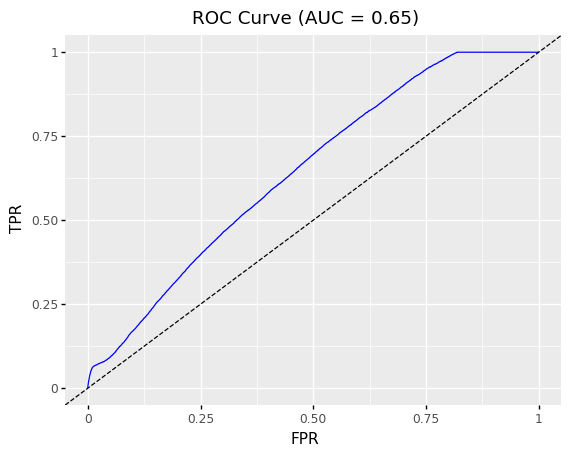


            FPR       TPR
0      0.000000  0.000000
1      0.000000  0.000077
2      0.000000  0.001226
3      0.000007  0.001226
4      0.000007  0.001379
...         ...       ...
24363  0.819683  0.999923
24364  0.819836  0.999923
24365  0.819836  1.000000
24366  0.820204  1.000000
24367  1.000000  1.000000

[24368 rows x 2 columns]


In [42]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(comparison_df['label'], comparison_df['pred_prob'])
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Create the ROC plot
roc_plot = (ggplot(roc_df, aes(x='FPR', y='TPR')) +
            geom_line(color='blue') +
            geom_abline(intercept=0, slope=1, color='black', linetype='dashed') +
            ggtitle(f'ROC Curve (AUC = {roc_auc:.2f})'))

print(roc_plot)
print(roc_df)